# No 1.  Find a, k, b, with Save load model

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch import nn
from torch.functional import F
from copy import copy
import seaborn as sns
sns.set_style("whitegrid")


/Users/tuchsanai/opt/anaconda3/envs/torch/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
n     = 3000
x     = torch.arange(n,dtype=torch.float32)
a, k, b,f = 0.5, .3, 0.1, 0.85


x[0:50]

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
        28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41.,
        42., 43., 44., 45., 46., 47., 48., 49.])

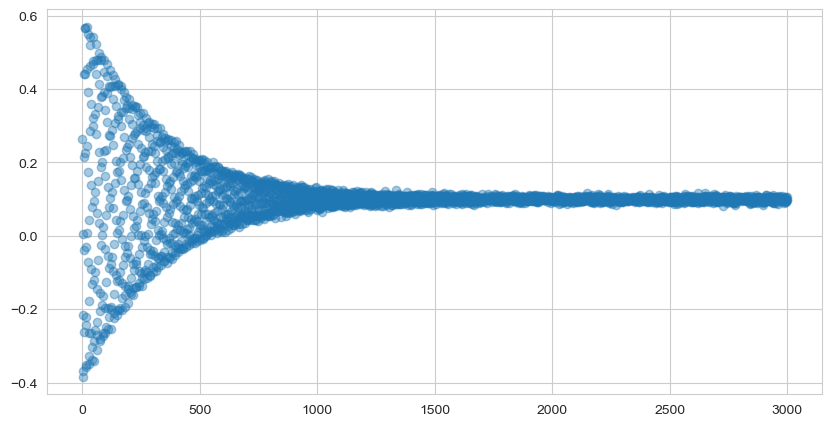

In [3]:
noise = torch.Tensor(np.random.normal(0, 0.005, size=n))

a, k, b,f = 0.5, .3, 0.1, 0.35

y = a * torch.exp(-k * x/100)*torch.sin(100*x+f) + b +   noise

plt.figure(figsize=(10, 5))
plt.scatter(x, y, alpha=0.4)

# No 2 : find mu and sigma

In [51]:
Ncluster    = np.random.randint(3, 7)
n           = 50000

mu = np.random.uniform(-1, 1, size=Ncluster)
sigma = np.random.uniform(0.1, 0.5, size=Ncluster)

print("Ncluster = ", Ncluster)
print("mu = ", mu)
print("sigma = ", sigma)



Ncluster =  5
mu =  [ 0.54697579  0.74892213  0.01491084 -0.99794878 -0.22164048]
sigma =  [0.24648567 0.19845084 0.43466023 0.39541354 0.42843935]


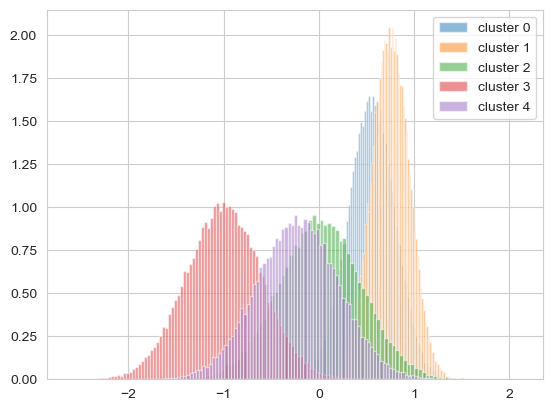

In [52]:
for i in range(Ncluster):
    x = np.random.normal(mu[i], sigma[i], size=n)
    plt.hist(x, bins=100, alpha=0.5, density=True, label="cluster {}".format(i))
    plt.legend()
   


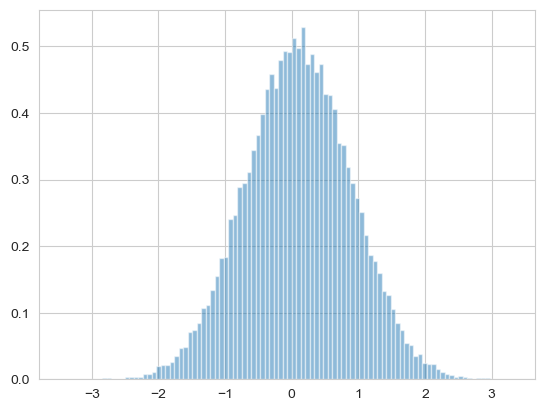

In [53]:
y = np.zeros(n)

for i in range(Ncluster):
    x = np.random.normal(mu[i], sigma[i], size=n)
    y += x

plt.hist(y, bins=100, alpha=0.5, density=True)
plt.show()